In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import re
sns.set()
%matplotlib inline
#Algorithem Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
data = pd.read_csv('../input/heart.csv')
df = data.copy()

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
X = df.drop('target', axis=1)
Y = df['target']

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,random_state=0)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(212, 13) (212,)
(91, 13) (91,)


In [7]:
#Logisctic Regression
clf_lr = LogisticRegression().fit(xtrain, ytrain)
logistic_regression_pred = clf_lr.predict(xtest)
lr_pred_prb = clf_lr.predict_proba(xtest)[:,1]
#Accuracy
accuracy_logistic_regression = accuracy_score(ytest, logistic_regression_pred)
#Recall
recall_lr = recall_score(ytest,logistic_regression_pred)
#AUC
auc_lr = roc_auc_score(ytest,lr_pred_prb)
    
#KNN
scaler = StandardScaler()  
scaler.fit(xtrain)
X_train_ = scaler.transform(xtrain)
X_test_ = scaler.transform(xtest)
X_train = pd.DataFrame(data=X_train_, columns=xtrain.columns)
X_test = pd.DataFrame(data=X_test_, columns=xtest.columns)
clf_knn = KNeighborsClassifier(n_neighbors=6).fit(X_train,ytrain)
knn_pred = clf_knn.predict(X_test)
knn_pred_prb = clf_knn.predict_proba(xtest)[:,1]
#Accuracy
accuracy_knn = accuracy_score(ytest,knn_pred)
#Recall
recall_knn = recall_score(ytest,knn_pred)
#AUC
auc_knn = roc_auc_score(ytest,lr_pred_prb)

#Decision Tree Classifier
clf_dt = DecisionTreeClassifier(criterion='gini',max_depth=3).fit(xtrain, ytrain)
decision_tree_classifier_pred = clf_dt.predict(xtest)
dt_pred_prb = clf_dt.predict_proba(xtest)[:,1]
#Accuracy
accuracy_decision_tree_classifier = accuracy_score(ytest,decision_tree_classifier_pred)
#Recall
recall_dt = recall_score(ytest,decision_tree_classifier_pred)
#AUC
auc_dt = roc_auc_score(ytest,lr_pred_prb)
    
#Random Forest
clf_rf = RandomForestClassifier(max_depth=4).fit(xtrain, ytrain)
random_forest_pred = clf_rf.predict(xtest)
rf_pred_prb = clf_rf.predict_proba(xtest)[:,1]
#Accuracy
accuracy_random_forest = accuracy_score(ytest,random_forest_pred)
#Recalla
recall_rf = recall_score(ytest,random_forest_pred)
#AUC
auc_rf = roc_auc_score(ytest,rf_pred_prb)
    
#XGBoost
clf_xgb = xgb.XGBClassifier(seed=42,nthread=1).fit(xtrain, ytrain)
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb = clf_xgb.predict_proba(xtest)[:,1]
#Accuracy
accuracy_xgboost = accuracy_score(ytest,xgb_pred)
#Recall
recall_xgb = recall_score(ytest,xgb_pred)
#AUC
auc_xgb = roc_auc_score(ytest,lr_pred_prb)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 

In [8]:
F_dict = {        
    "Algorithms":["Logistic Regression","KNN","Decision Tree Classifier","Random Forest","XGBoost"],
    "Accuracy":[accuracy_logistic_regression,accuracy_knn,accuracy_decision_tree_classifier,accuracy_random_forest,accuracy_xgboost],
    'AUC':[auc_lr,auc_knn,auc_dt,auc_rf,auc_xgb]
}
final_result = pd.DataFrame(F_dict)
final_result

,Algorithms,Accuracy,AUC
0,Logistic Regression,0.802198,0.880561
1,KNN,0.868132,0.880561
2,Decision Tree Classifier,0.813187,0.880561
3,Random Forest,0.802198,0.880561
4,XGBoost,0.802198,0.880561


In [9]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

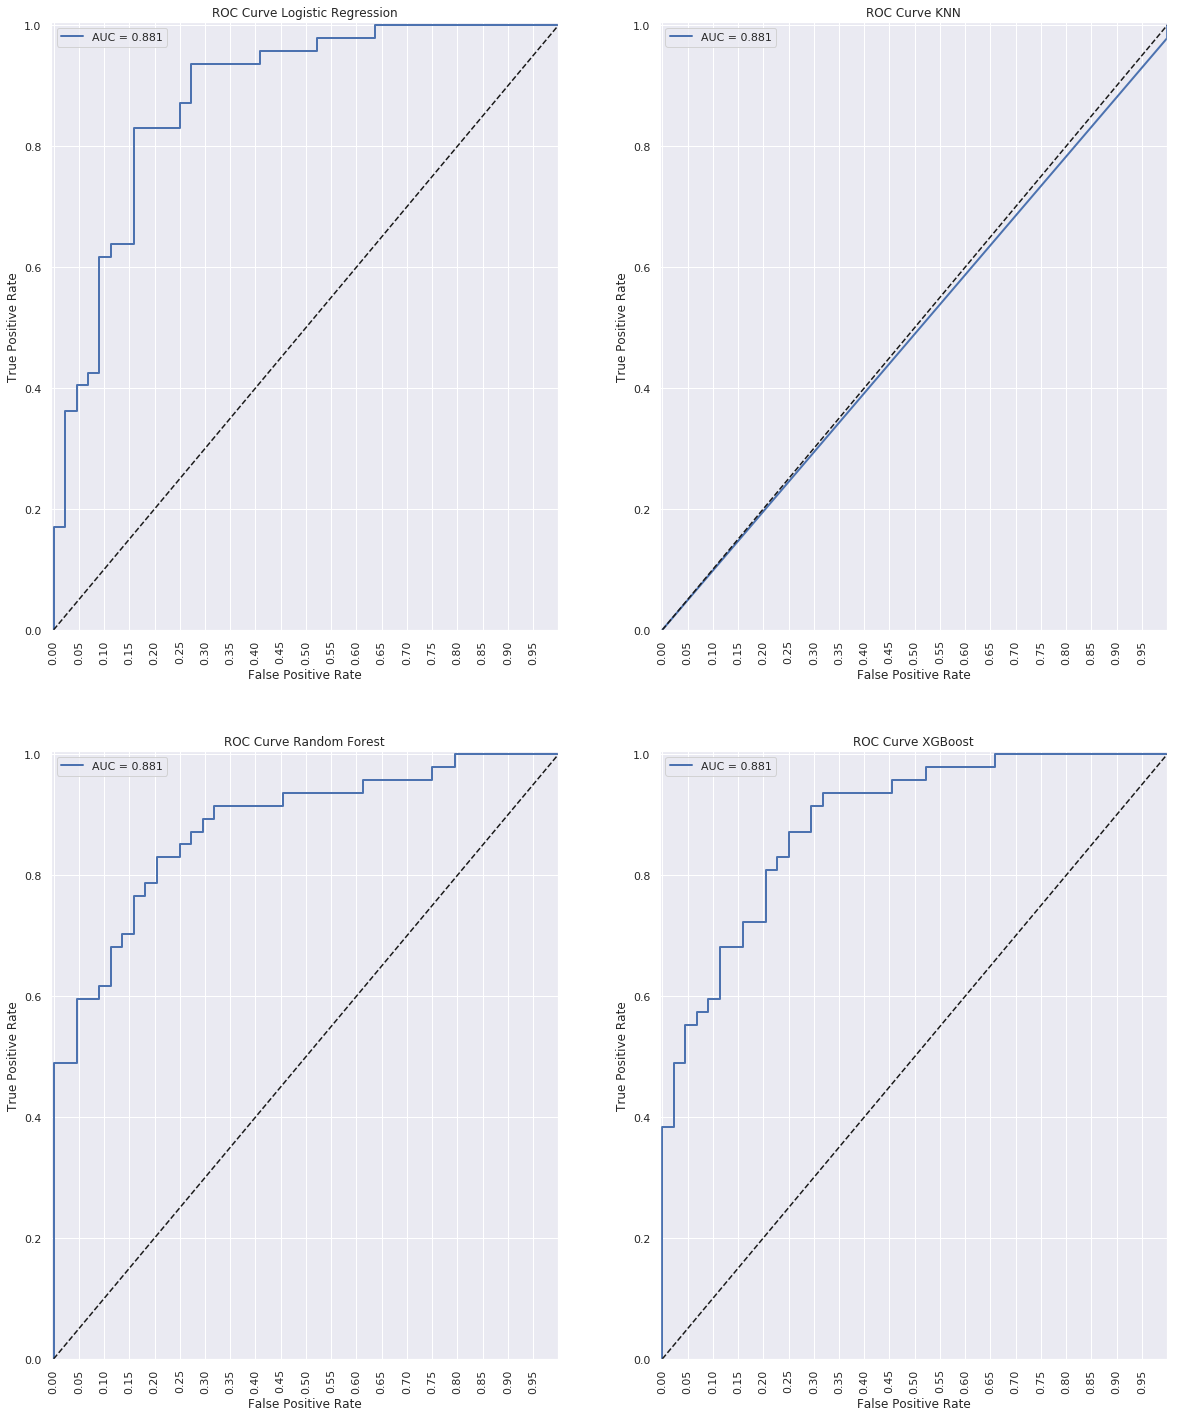

In [10]:
plt.figure(figsize=(20, 38))
plt.subplot(321)
plt.title('ROC Curve Logistic Regression')
fpr_lr,tpr_lr,threshold_lr = roc_curve(ytest,lr_pred_prb)
plot_roc_curve(fpr_lr,tpr_lr,label='AUC = %0.3f'% auc_lr)

plt.subplot(322)
plt.title('ROC Curve KNN')
fpr_knn,tpr_knn,threshold_knn = roc_curve(ytest,knn_pred_prb)
plot_roc_curve(fpr_knn,tpr_knn,label='AUC = %0.3f'% auc_knn)

plt.subplot(323)
plt.title('ROC Curve Random Forest')
fpr_rf,tpr_rf,threshold_rf = roc_curve(ytest,rf_pred_prb)
plot_roc_curve(fpr_rf,tpr_rf,label='AUC = %0.3f'% auc_rf)

plt.subplot(324)
plt.title('ROC Curve XGBoost')
fpr_xgb,tpr_xgb,threshold_xbg = roc_curve(ytest,xgb_pred_prb)
plot_roc_curve(fpr_xgb,tpr_xgb,label='AUC = %0.3f'% auc_xgb)

Text(0.5,1,'Decision Classifier - Features Importance')

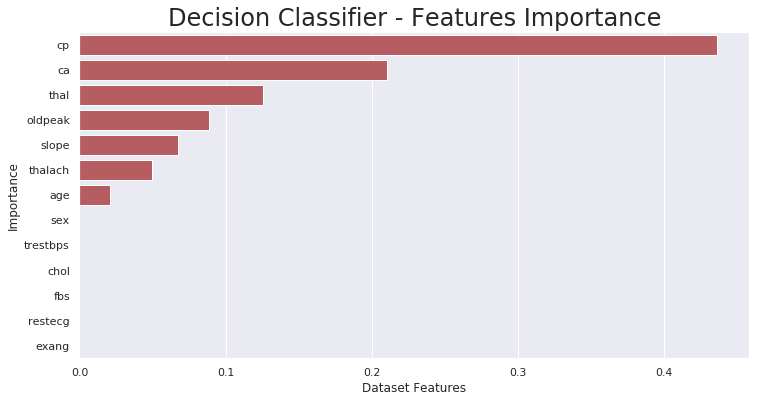

In [11]:
features_tuple=list(zip(X.columns,clf_dt.feature_importances_))
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])
feature_imp=feature_imp.sort_values("Importance",ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance",y="Feature Names", data=feature_imp, color='r')
sns.set_context('poster')
plt.xlabel("Dataset Features")
plt.ylabel("Importance")
plt.title("Decision Classifier - Features Importance")